<a href="https://colab.research.google.com/github/gyyang/neurogym/blob/master/neurogym/examples/example_NeuroGym_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NeuroGym

NeuroGym is a comprehensive toolkit that allows training any network model on many established neuroscience tasks using Reinforcement Learning techniques. It includes working memory tasks, value-based decision tasks and context-dependent perceptual categorization tasks.

In this notebook we first show how to install the relevant toolbox. 

We then show how to access the available tasks and their relevant information.

Finally we train an LSTM network on the Random Dots Motion task using standard supervised learning techniques (with Keras), and plot the results.

### Installation

In [1]:
%tensorflow_version 1.x
# Install gym
! pip install gym
# Install neurogym
! git clone https://github.com/gyyang/neurogym.git
%cd neurogym/
! pip install -e .

Cloning into 'neurogym'...
remote: Enumerating objects: 438, done.
remote: Counting objects: 100% (438/438), done.
remote: Compressing objects: 100% (291/291), done.
remote: Total 5433 (delta 278), reused 285 (delta 147), pack-reused 4995
Receiving objects: 100% (5433/5433), 4.74 MiB | 2.75 MiB/s, done.
Resolving deltas: 100% (3880/3880), done.
/content/neurogym
Obtaining file:///content/neurogym
  Running setup.py develop for neurogym


### Access tasks and wrappers info

#### Get list of available tasks

In [4]:
from neurogym.meta import tasks_info
tasks_info.info();

### List of environments implemented


* 25 tasks implemented so far.


AngleReproduction-v0
AntiReach-v0
Bandit-v0
Combine-v0
DPA-v0
DawTwoStep-v0
DelayedMatchCategory-v0
DelayedMatchSample-v0
DelayedMatchToSampleDistractor1D-v0
DelayedResponse-v0
Detection-v0
GoNogo-v0
IntervalDiscrimination-v0
Mante-v0
MatchingPenny-v0
MemoryRecall-v0
MotorTiming-v0
NAltPerceptualDecisionMaking-v0
PerceptualDecisionMaking-v0
Reaching1D-v0
Reaching1DWithSelfDistraction-v0
ReadySetGo-v0
Romo-v0
padoaSch-v0
pdWager-v0



#### Get information about specific task

#### Example trials ####


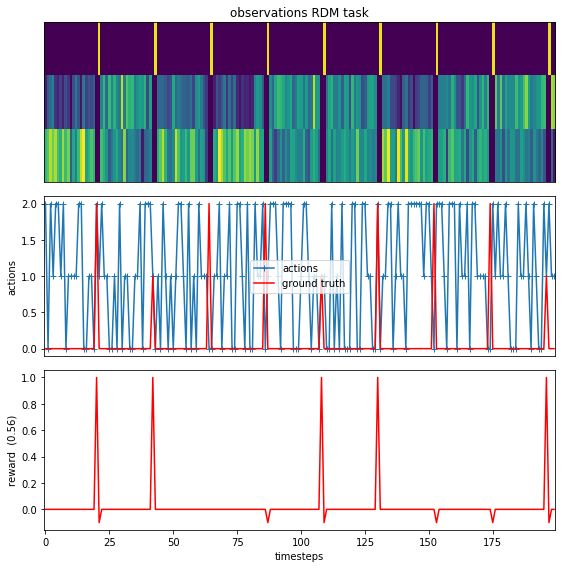

### PerceptualDecisionMaking task ###

Logic: Random dot motion task. Two-alternative forced
         choice task in which the subject has to integrate two stimuli to
         decide which one is higher on average

Reference paper: 

[The analysis of visual motion: a comparison of
        neuronal and psychophysical performance](https://www.jneurosci.org/content/12/12/4745)

Default Epoch timing (ms) 

fixation : constant 100

stimulus : constant 2000

decision : constant 100

stimEv : Controls the difficulty of the experiment. (def: 1.)


#### Source code #### 

class PerceptualDecisionMaking(ngym.EpochEnv):
    metadata = {
        'description': '''Random dot motion task. Two-alternative forced
         choice task in which the subject has to integrate two stimuli to
         decide which one is higher on average''',
        'paper_link': 'https://www.jneurosci.org/content/12/12/4745',
        'paper_name': '''The analysis of visual motion: a comparison of
        neuronal and psych

In [5]:
tasks_info.info('PerceptualDecisionMaking-v0', show_code=True, show_fig=True);

#### Get list of available wrappers

In [6]:
tasks_info.info_wrapper();

### List of wrappers implemented


* 9 wrappers implemented so far.


CatchTrials-v0
MissTrialReward-v0
Monitor-v0
Noise-v0
PassAction-v0
PassReward-v0
ReactionTime-v0
SideBias-v0
TrialHistory-v0



#### Get information about specific wrapper

In [7]:
tasks_info.info_wrapper('Monitor-v0', show_code=True);

### Monitor-v0 wrapper ###

Logic: Saves relevant behavioral information: rewards, actions, observations, new trial, ground truth

Input parameters: 

folder : Folder where the data will be saved. (def: None)

num_tr_save : Data will be saved every num_tr_save trials.
        (def: 100000)


#### Source code #### 

class Monitor(Wrapper):
    metadata = {
        'description': 'Saves relevant behavioral information: rewards,' +
        ' actions, observations, new trial, ground truth',
        'paper_link': None,
        'paper_name': None,
        'folder': 'Folder where the data will be saved. (def: None)',
        'num_tr_save': '''Data will be saved every num_tr_save trials.
        (def: 100000)''',
    }

    def __init__(self, env, folder=None, num_tr_save=100000):
        Wrapper.__init__(self, env=env)
        self.env = env
        self.num_tr = 0
        # data to save
        self.choice_mat = []
        self.gt_mat = []
        self.stim_mat = []
        self.reward_mat =

In [0]:
tasks_info.info_wrapper('TrialHistory-v0')

### TrialHistory-v0 wrapper ###

Logic: Change ground truth probability based on previous outcome.

Reference paper: 

[Response outcomes gate the impact of expectations
         on perceptual decisions](https://www.biorxiv.org/content/10.1101/433409v3)

Input parameters: 

block_dur : Number of trials per block. (def: 200 (int))

blk_ch_prob : If not None, specifies the probability of changing
        block (randomly). (def: None)

rep_prob : Specifies probabilities of repeating for each block.
        (def: (.2, .8))




### Example

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20, 3)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 20, 256)           266240    
_________________________________________________________________
time_distributed (TimeDistri (None, 20, 3)             771       
Total params: 267,011
Trainable params: 267,011
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Accuracy:  0.8
Performance:  0.0
epoch 0 out of 100
remaining time: 0.32
-------------
Accuracy:  0.9072
Performance:  0.536
epoch 10 out of 100
remaining time: 0.01
-------------
Accuracy:  0.9296
Performance:

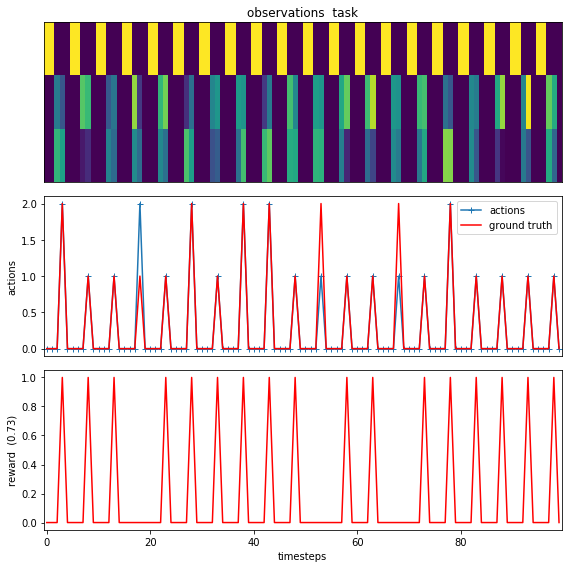

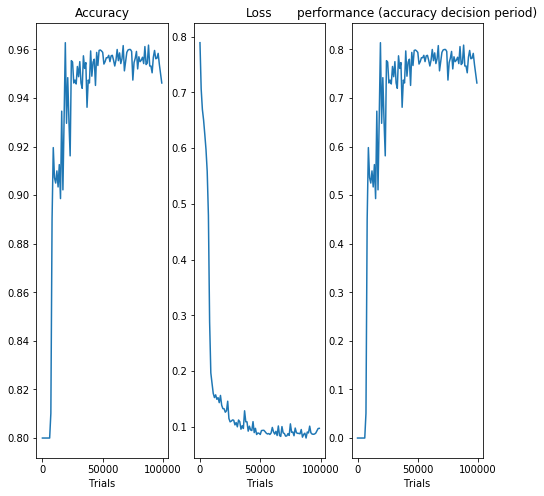

In [8]:
from neurogym.examples import example_NeuroGym_keras as exK
# ARGS
task = 'PerceptualDecisionMaking-v0'
num_trials = 100000
rollout = 20
dt = 100
kwargs = {'dt': 100, 'timing': {'fixation': ('constant', 200),
                                'stimulus': ('constant', 200),
                                'decision': ('constant', 100)}}  # decision periods longer than 1 timesteps are not suitable for supervised training

model = exK.train_env_keras_net(task, kwargs=kwargs,
                                rollout=rollout, num_tr=num_trials,
                                num_h=256, b_size=128,
                                tr_per_ep=1000, verbose=1)
